<a href="https://colab.research.google.com/github/barrosm/DeepLearningExamples/blob/master/MB_detetortumorcerebral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/BIMaster_2019/Redes_Neurais/Deep Learning/brain exercise'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
os.listdir('brain_tumor_dataset')

['yes', 'no']

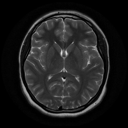

In [12]:
im =Image.open('brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

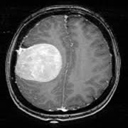

In [13]:
im =Image.open('brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [0]:
yes=os.listdir('brain_tumor_dataset/yes')
no=os.listdir('brain_tumor_dataset/no')

In [15]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [16]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [17]:
len(data_target)==len(data)

True

In [18]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
data

array(['Y1.jpg', 'Y101.jpg', 'Y10.jpg', 'Y100.JPG', 'Y102.jpg',
       'Y105.jpg', 'Y103.jpg', 'Y107.jpg', 'Y106.jpg', 'Y104.jpg',
       'Y112.JPG', 'Y114.JPG', 'Y116.JPG', 'Y109.JPG', 'Y108.jpg',
       'Y117.JPG', 'Y113.JPG', 'Y11.jpg', 'Y111.JPG', 'Y115.JPG',
       'Y12.jpg', 'Y13.jpg', 'Y153.jpg', 'Y154.jpg', 'Y14.jpg',
       'Y120.JPG', 'Y15.jpg', 'Y148.JPG', 'Y146.JPG', 'Y147.JPG',
       'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y161.JPG', 'Y160.JPG',
       'Y16.JPG', 'Y158.JPG', 'Y159.JPG', 'Y163.JPG', 'Y162.jpg',
       'Y164.JPG', 'Y167.JPG', 'Y166.JPG', 'Y17.jpg', 'Y180.jpg',
       'Y170.JPG', 'Y168.jpg', 'Y165.JPG', 'Y169.jpg', 'Y18.JPG',
       'Y181.jpg', 'Y192.JPG', 'Y185.jpg', 'Y182.JPG', 'Y186.jpg',
       'Y19.JPG', 'Y184.JPG', 'Y183.jpg', 'Y188.jpg', 'Y187.jpg',
       'Y2.jpg', 'Y242.JPG', 'Y20.jpg', 'Y21.jpg', 'Y193.JPG', 'Y195.JPG',
       'Y24.jpg', 'Y22.jpg', 'Y194.jpg', 'Y23.JPG', 'Y247.JPG',
       'Y245.jpg', 'Y246.JPG', 'Y243.JPG', 'Y25.jpg', 'Y251.JPG',
   

In [0]:
yes_values=os.listdir('brain_tumor_dataset/yes')
no_values=os.listdir('brain_tumor_dataset/no')

In [0]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [0]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [24]:
len(X_data)==len(data)==len(data_target)

False

In [0]:
X = np.squeeze(X_data)


In [26]:
X.shape


(351, 32, 32, 3)

In [0]:
# normalize data
X = X.astype('float32')
X /= 255

In [0]:
#categorical_labels = to_categorical(data_target, num_classes=2)


In [28]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [31]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))  # dropout serve para jogar fora neuronios que não forma ativados

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten()) # é para transformar a matriz num vetor vertical

model.add(tf.keras.layers.Dense(512, activation='relu')) # aqui é uma camada de 512 neuronios
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # na ultima camada usa-se a sigmoide

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 36)         

In [0]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [33]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 1s 272ms/step - loss: 0.5669 - acc: 0.8105 - val_loss: 1.0889 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 188ms/step - loss: 0.4846 - acc: 0.8158 - val_loss: 0.8840 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 201ms/step - loss: 0.4890 - acc: 0.8158 - val_loss: 0.9590 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 192ms/step - loss: 0.4721 - acc: 0.8158 - val_loss: 1.2019 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 190ms/step - loss: 0.4773 - acc: 0.8158 - val_loss: 1.0540 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 184ms/step - loss: 0.4546 - acc: 0.8158 - val_loss: 0.9373 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 187ms/step - loss: 0.4622 - acc: 0.8158 - val_loss: 1.0119 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 0s 1

In [34]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

ValueError: ignored

In [0]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

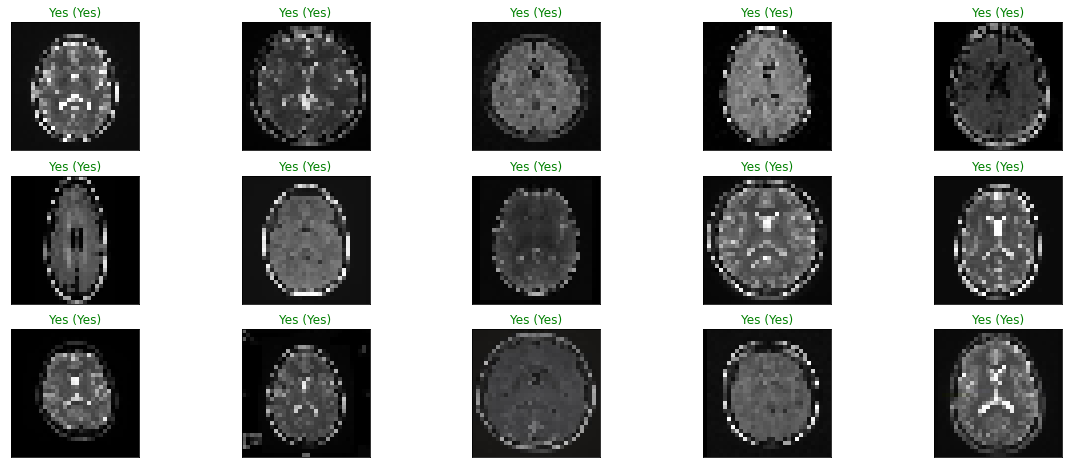

In [0]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()